Failed to load with encoding: utf-8
File loaded successfully with encoding: latin1
      product_category                                product_description  \
8970            Camera  Nikon Wide Angle AF Nikkor 24mm f/2.8D Lens [I...   
6899            Camera  Nikon Wide Angle AF Nikkor 24mm f/2.8D Lens [I...   
12769           Camera        Developing the Quarterback - The Basics VHS   
12768           Camera  Cokin 96mm Adaptor Ring with 1.00 Thread Pitch...   
13697           Camera            Hasselblad 907X Anniversary Edition Kit   
...                ...                                                ...   
24354           Laptop  ASUS VivoBook S15 S533 Thin and Light Laptop, ...   
24344           Laptop  MSI PRO DP20ZA Desktop, AMD Ryzen R7-5700G, Ra...   
23934           Laptop  ASUS Chromebook Flip CX3, 14" Touchscreen FHD ...   
24130           Laptop  HP Elite Mini 800 G9 Desktop Computer - Intel ...   
18588  Car Accessories  Buyers Products PU5007 Hydraulic Power Unit (P

C:\Users\91720\AppData\Local\Temp\ipykernel_10848\4264571128.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


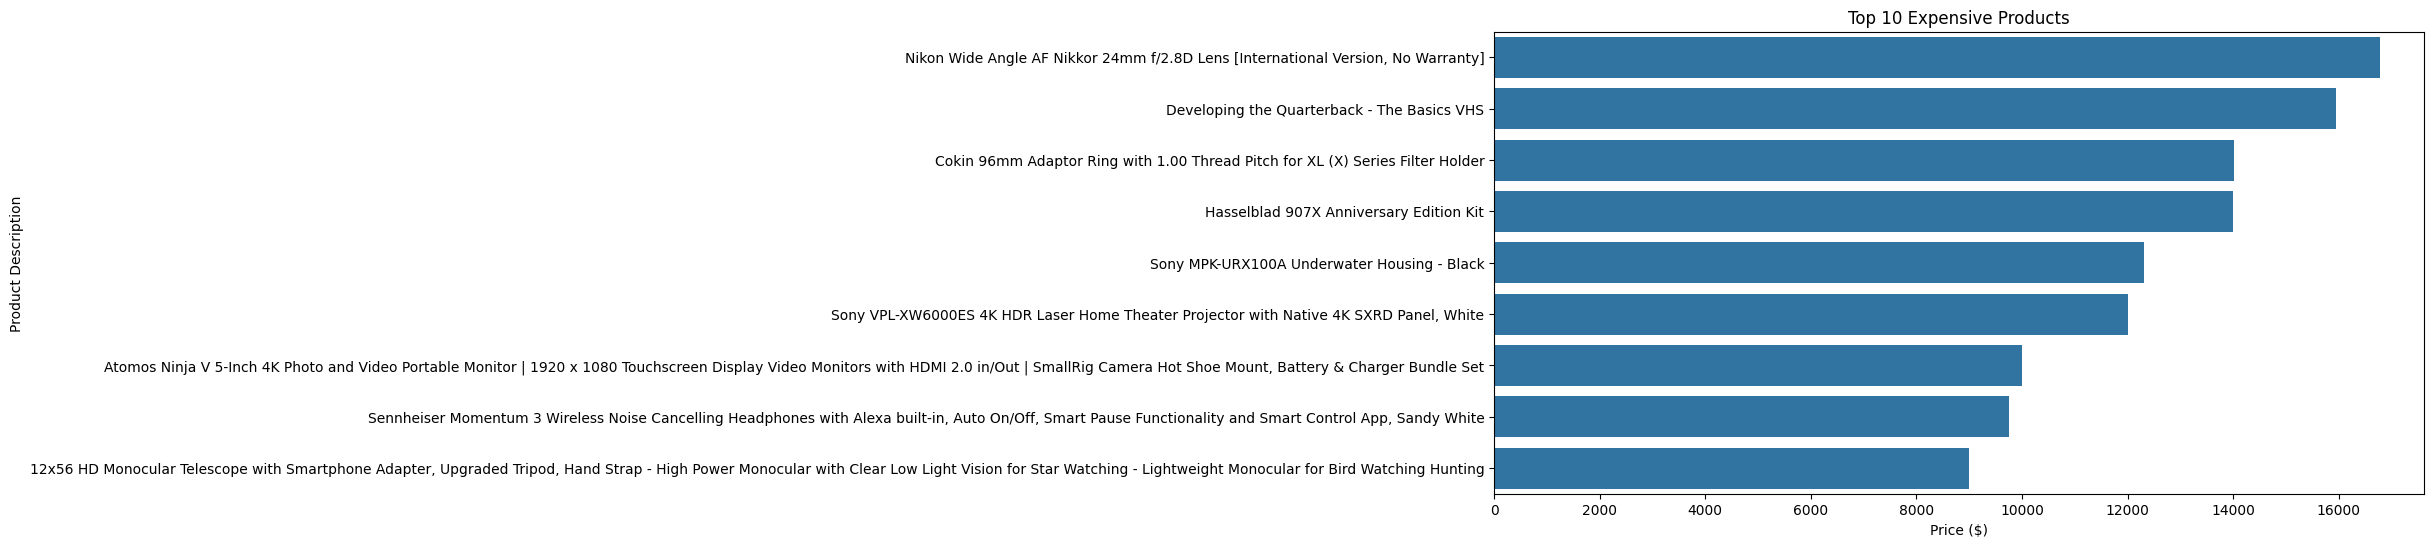

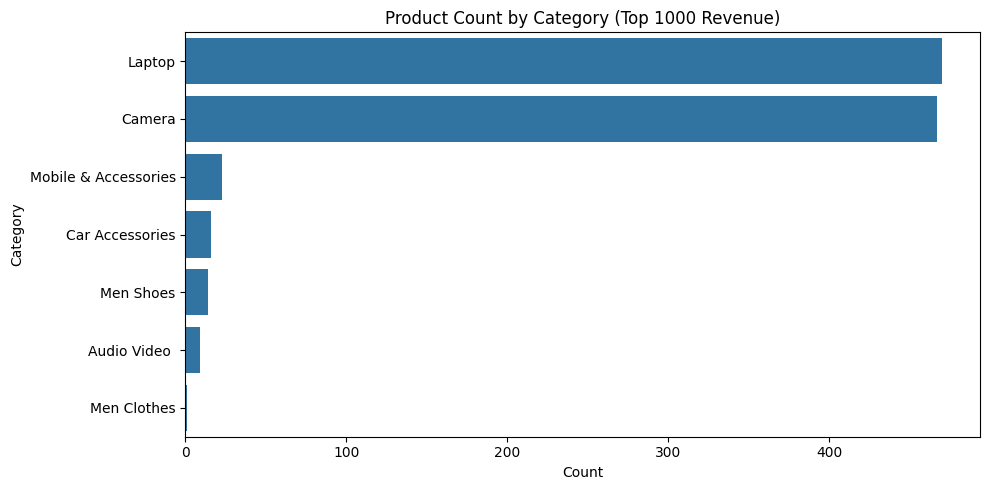

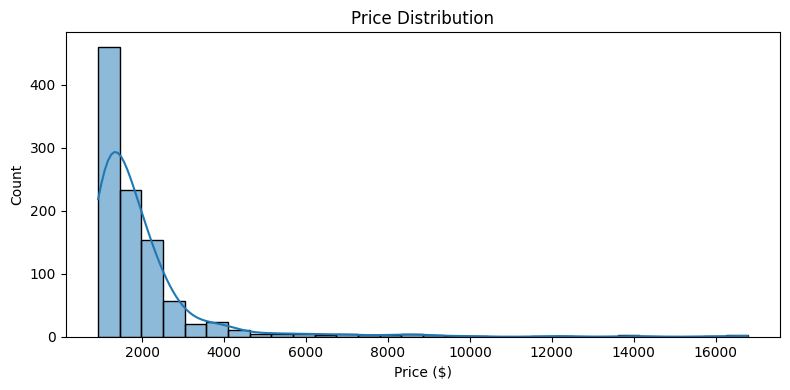

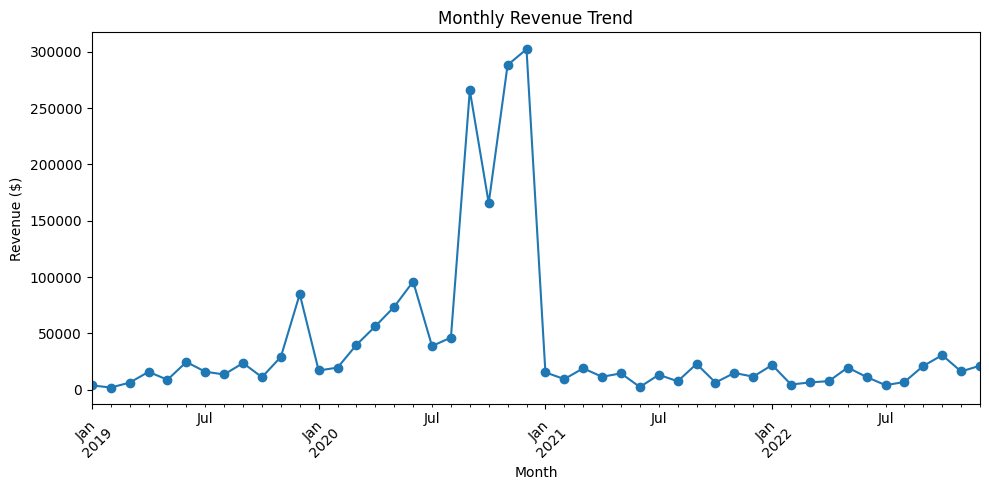

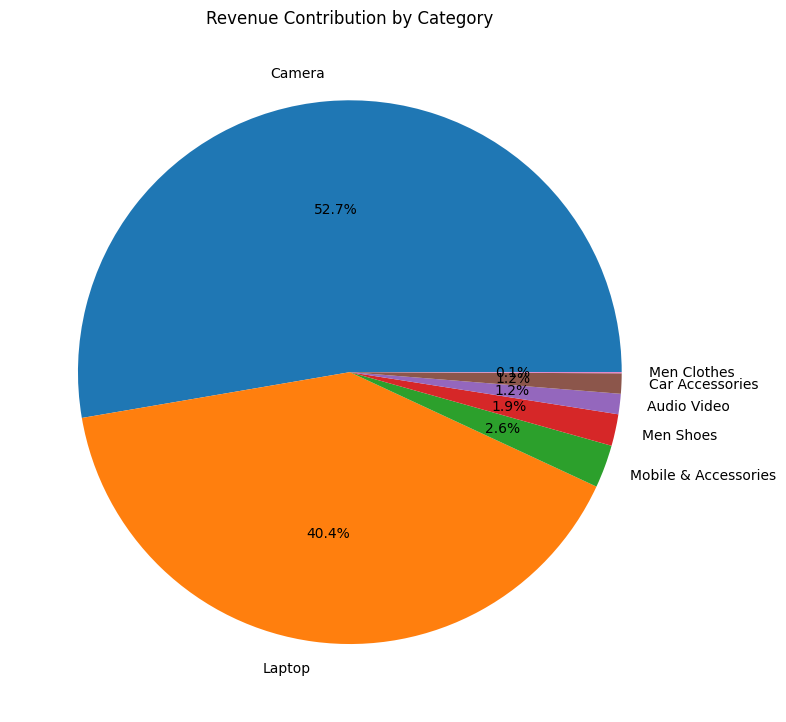

In [31]:
import pandas as pd

# 1. फाईलचा path (r-string वापरून escape sequence टाळा)
file_path = r"C:\Users\91720\AmazonProjectDA\Amazon_Combined_Data_csv.csv"

# 2. CSV फाईल वाचा, encoding बदलून पाहा (utf-8, latin1, cp1252, ISO-8859-1)
encodings = ['utf-8', 'latin1', 'cp1252', 'ISO-8859-1']

df = None
for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"File loaded successfully with encoding: {enc}")
        break
    except UnicodeDecodeError:
        print(f"Failed to load with encoding: {enc}")

if df is None:
    print("Failed to load the file with tried encodings.")
else:
    # 3. Column names मध्ये spaces, case आणि special characters साठी cleanup करा
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # 4. price(dollar) मध्ये commas काढून float मध्ये convert करा
    df['price(dollar)'] = df['price(dollar)'].str.replace(',', '').astype(float)

    # 5. price(dollar) नुसार descending order मध्ये sort करा आणि top 1000 rows select करा
    top_1000_revenue = df.sort_values(by='price(dollar)', ascending=False).head(1000)

    # 6. output पाहण्यासाठी print करा
    print(top_1000_revenue)
    
    # 7. missing value check
    print(top_1000_revenue.isnull().sum())

    # 8. duplicate value check
    top_1000_revenue = top_1000_revenue.drop_duplicates()

    # 9. datatype check
    top_1000_revenue['order_date'] = pd.to_datetime(top_1000_revenue['order_date'], dayfirst=True)

    import matplotlib.pyplot as plt
    import seaborn as sns

    top_10 = top_1000_revenue.sort_values(by='price(dollar)', ascending=False).head(10)

    plt.figure(figsize=(12,6))
    sns.barplot(data=top_10, x='price(dollar)', y='product_description')
    plt.title('Top 10 Expensive Products')
    plt.xlabel('Price ($)')
    plt.ylabel('Product Description')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,5))
    sns.countplot(data=top_1000_revenue, y='product_category', order=top_1000_revenue['product_category'].value_counts().index)
    plt.title('Product Count by Category (Top 1000 Revenue)')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(8,4))
    sns.histplot(top_1000_revenue['price(dollar)'], bins=30, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price ($)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Order date datetime मध्ये convert करा
    top_1000_revenue['order_date'] = pd.to_datetime(top_1000_revenue['order_date'], errors='coerce')

    # Month-wise revenue check
    monthly = top_1000_revenue.groupby(top_1000_revenue['order_date'].dt.to_period('M')).sum(numeric_only=True)

    plt.figure(figsize=(10,5))
    monthly['price(dollar)'].plot(marker='o')
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    cat_revenue = top_1000_revenue.groupby('product_category')['price(dollar)'].sum().sort_values(ascending=False)

    plt.figure(figsize=(8,8))
    cat_revenue.plot.pie(autopct='%1.1f%%')
    plt.title('Revenue Contribution by Category')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


